## Homework 5 Assignment 1

In [1]:
#importing packages
import os
import numpy as np
import pandas as pd
import pylab as pl
from scipy import stats
import scipy.stats


%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Generate N samples from a distribution of your choice, but not a Gaussian with a chosen mean μ and standard deviation σ: N(μ, σ) and calculate the mean of each sample (all samples should have the same size n).

Generating N = 100 samples of a Poisson distribution. All with mean = 1024 and std = 32. _(Remember for Poisson lambda = mean = variance)_

I am going to create a dictionary for the 100 samples. Why? First, the random.poisson function returns an ndarray. So I need somewhere to easily store this output, and this will be the value of my dictionary for every key. The keys will simply be '0' through '99', for my 100 samples.

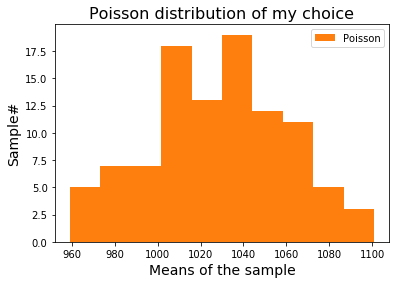

Figure1: Poisson distribution with lambda = 1024


In [2]:
# Below is the distribution of my choice, a Poisson with mean (and lambda) of 100
np.random.seed(999)

mean = 1024
size = 100

pois = np.random.poisson(mean, size)
pl.hist(pois)

pl.hist(pois, label="Poisson")
pl.legend()
pl.title("Poisson distribution of my choice", size = 16)
pl.xlabel('Means of the sample', size = 14);
pl.ylabel('Sample#', size = 14);  


pl.show()

print ("Figure1: Poisson distribution with lambda = 1024")

In [3]:
np.random.seed(999)

nSamples = {}

lam = mean
sigma = np.sqrt(lam)

n = 100

for i in range(n):
    nSamples[i] = np.random.poisson(lam, n)

#Now, to calculate the means for each of the samples, I am going to store that in ... an array
# maybe I will change to a dictionary later? 

# for now I am going to create an array: 
sMeans = np.zeros(n,float)

for i in range(n):
    sMeans[i] = nSamples[i].mean()

#print nSamples.keys()

In [4]:
#Printing just to make sure things make sense:
#print nSamples[0] , nSamples[0].size
#print nSamples[22] , nSamples[0].size

In [5]:
#Printing just to make sure things make sense:
#print sMeans, sMeans.size

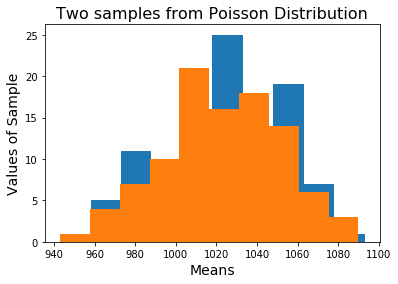

Figure2: Two Poisson samples


In [6]:
#Let's plot two of the samples to see how it looks like:
pl.hist(nSamples[3]);
pl.hist(nSamples[22]);

pl.title("Two samples from Poisson Distribution", size = 16)
pl.xlabel('Means', size = 14);
pl.ylabel('Values of Sample', size = 14);  


pl.show()
print ("Figure2: Two Poisson samples")

### Assess the validity of the Z-test: 
### If the samples are drawn from the distribution you are testing the z-values you calculate should follow a N(0,1) distribution (a Gaussian with mean 0 and standard deviation 1). 
### Show that the distribution of z -statistics (find the formula in a statistics book or in last week’s slides) that you calculated (one for each sample) is indeed consistent with N(0,1).

In [7]:
np.random.seed(999)

# zTest = (mean - mS) / sigma * sqrt(n)
# mS is the means of each individual sample, out of the 100

zScores = np.zeros(n,float)

for i in range(n):
    zScores[i] = (mean - sMeans[i]) / sigma * sqrt(n)

gauss = np.random.normal(0, 1, 100)

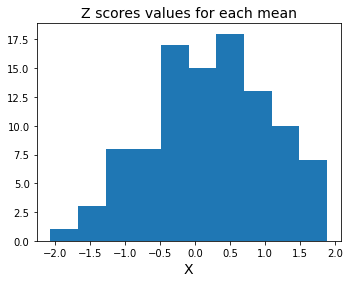

Figure3: The figure above simply shows the values of the z Test for each of the means


In [8]:
## Plotting

fig = pl.figure(figsize=(12,4)) 
ax = fig.add_subplot(121)

ax.hist(zScores)
#ax.hist(gauss,alpha=0.5)

ax.set_title("Z scores values for each mean", size = 14)
ax.set_xlabel('X', size = 14);


pl.show()
print ("Figure3: The figure above simply shows the values of the z Test for each of the means")

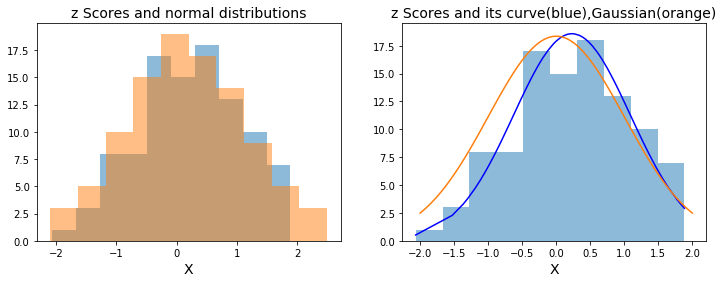

Figure4: The figure above shows to the left our histogram for the Z score values of our samples, and in orange a normal distribution on top with mu = 0 and std = 1 to the right we are fitting our z statistics with a gaussian model what we see is the difference between the two lines


In [9]:
### MORE PLOTTING

# ***** First section *****
# histogram of my Z scores and histogram of normal distribution

fig = pl.figure(figsize=(12,4)) 
ax1 = fig.add_subplot(121)

ax1.hist(zScores, alpha=0.5)
ax1.hist(gauss,alpha=0.5)

ax1.set_title("z Scores and normal distributions", size = 14)
ax1.set_xlabel('X', size = 14);

# ***** Second section ***** 
# histogram of my Z scores and it's curve and a gaussian curve

zScores_sorted = sorted(zScores)
fit = (stats.norm.pdf(zScores_sorted,np.mean(zScores_sorted),np.std(zScores_sorted))*40)

#the gaussian curve with mu = 0 and std 1
mu = 0
std = 1
gauss_x = np.linspace(mu - 2*std, mu + 2*std, 100)

ax2 = fig.add_subplot(122)
ax2.hist(zScores, alpha=0.5)
ax2.plot(zScores_sorted, fit, '-b')  
ax2.plot(gauss_x,stats.norm.pdf(gauss_x,mu,std)*46)

ax2.set_title("z Scores and its curve(blue),Gaussian(orange)", size = 14)
ax2.set_xlabel('X', size = 14);

pl.show()
print ("Figure4: The figure above shows to the left our histogram for the Z score values"
       + " of our samples, and in orange a normal distribution on top with mu = 0 and std = 1"
       + " to the right we are fitting our z statistics with a gaussian model"
       + " what we see is the difference between the two lines")

## We are now going to assess the fit with the KS and AD tests

### $H_0$ =  The Z values from a 100 samples of a Poisson distribution follow a Normal distribution
#### $\alpha = 0.05$

In [12]:
#generate the distribution
alpha = 0.05
np.random.seed(999)
dist_n = np.random.randn(1000) 

#test ad and ks. those are easy
print ("Z Scores on normal", scipy.stats.kstest(zScores,'norm'))
print ("Z Scores on normal", scipy.stats.anderson(zScores, dist='norm'))
print ("") 

('Z Scores on normal', KstestResult(statistic=0.1323784316630332, pvalue=0.05468248937076825))
('Z Scores on normal', AndersonResult(statistic=0.25323964177916025, critical_values=array([ 0.555,  0.632,  0.759,  0.885,  1.053]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ])))



### Conclusion:
Using the __KS Test__ the pvalue of 0.054 is greater than my significance lever 0.05 so I __CANNOT__ reject my Null. 
# Question: This is troublesome, shouldn't it be a much large value??

Using the __AD Test__ the statistic obtained 0.2532 is lower than the critical value for significance level of 5 (0.759), therefore I __CANNOT__ reject H0